In [325]:
import statsmodels.api as sm

import sys
sys.path.append('../src')

from yf_dataset import *
from ta_features import *
from preprocessing import *

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import mlflow
import mlflow.sklearn
from mlflow.models import infer_signature

In [326]:
ticker = 'ko'
label = 'KO'
start_date = '2018-01-01'
close_price_period = '1d'
target_pct_change_period = 30 # n = period

In [327]:
ko_df = get_stock_data(ticker, start_date, period=close_price_period)
format_col_names(ko_df)
add_pct_ch_and_future(ko_df, period = target_pct_change_period)
# add_sma(ko_df, [14, 20, 50, 100, 200])
# add_rsi(ko_df, [14, 20, 50, 100, 200])
# add_ema(ko_df, [14, 20, 50, 100, 200])
add_sma(ko_df, [3, 5, 7, 10, 12, 14, 20, 50, 100, 200])
add_rsi(ko_df, [3, 5, 7, 10, 12, 14, 20, 50, 100, 200])
add_ema(ko_df, [3, 5, 7, 10, 12, 14, 20, 50, 100, 200])
# TODO: add more features (volume)
# Other models we're about to use will be able to learn non-linear relationships between the features and targets. This includes random forests, gradient boosting, and neural networks.
ko_df.dropna(inplace=True)
ko_df

# Using Percent Change as the Target:
# Relative Prediction:

# If your focus is on predicting the direction or relative movement of prices rather than the absolute level, using percent change is more appropriate. It captures the proportional change in the close price.
# Scale Independence:

# Percent change is scale-independent, meaning it is not affected by the magnitude of the close price. This can be advantageous when dealing with assets with different price levels.
# Common Approach in Finance:

# In financial modeling, predicting percentage returns or changes is a common practice. It aligns with the idea of measuring investment performance in relative terms.
# Better Handling of Non-Stationarity:

# Financial time series data often exhibits non-stationarity, where the statistical properties change over time. Percent change can help address this by focusing on relative movements.

[*********************100%%**********************]  1 of 1 completed


c:\Users\user\Desktop\FMLProject\FML\notebooks\../src\ta_features.py:14: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  df[str(period) + 'd_close_future_pct'] = df[str(period) + 'd_future_close'].pct_change(period) #calc future % change


,Open,High,Low,Close,Adj_Close,Volume,30d_close_pct,30d_future_close,30d_close_future_pct,sma3,...,ema3,ema5,ema7,ema10,ema12,ema14,ema20,ema50,ema100,ema200
Date,,,,,,,,,,,,,,,,,,,,,
2018-10-17,45.410000,45.990002,45.360001,45.860001,39.234158,11055800,0.019173,42.234734,0.076479,38.857727,...,38.961151,38.895857,38.912773,38.967051,39.000122,39.026795,39.072294,38.941434,38.531842,37.668853
2018-10-18,45.900002,46.080002,45.459999,45.610001,39.020275,12716900,0.004980,43.459179,0.113759,39.057349,...,38.990713,38.937330,38.939649,38.976728,39.003222,39.025926,39.067340,38.944526,38.541514,37.682300
2018-10-19,45.830002,46.490002,45.830002,46.330002,39.636250,13989200,0.021961,42.846954,0.081004,39.296894,...,39.313481,39.170303,39.113799,39.096641,39.100611,39.107303,39.121522,38.971652,38.563192,37.701742
2018-10-22,46.369999,46.459999,45.810001,45.970001,39.328270,14283600,0.006536,42.752106,0.087058,39.328265,...,39.320876,39.222959,39.167417,39.138755,39.135636,39.136765,39.141212,38.985637,38.578342,37.717926
2018-10-23,45.619999,46.459999,45.450001,46.360001,39.661926,17483900,0.015957,42.579639,0.073565,39.542149,...,39.491401,39.369281,39.291044,39.233877,39.216603,39.206786,39.190804,39.012158,38.599800,37.737270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-12,53.759998,53.830002,52.430000,52.810001,52.810001,19330400,-0.119746,58.570000,0.109070,53.516666,...,53.232531,53.431921,53.674559,54.074844,54.338290,54.590084,55.261860,57.274309,58.575351,59.194754
2023-10-13,52.740002,53.419998,52.639999,52.889999,52.889999,14494600,-0.108982,58.459999,0.105313,53.136667,...,53.061265,53.251280,53.478419,53.859418,54.115476,54.363406,55.035968,57.102375,58.462770,59.132020
2023-10-16,53.020000,53.560001,52.840000,53.430000,53.430000,12816800,-0.091993,58.580002,0.096388,53.043334,...,53.245633,53.310854,53.466315,53.781342,54.010018,54.238952,54.883019,56.958361,58.363111,59.075284


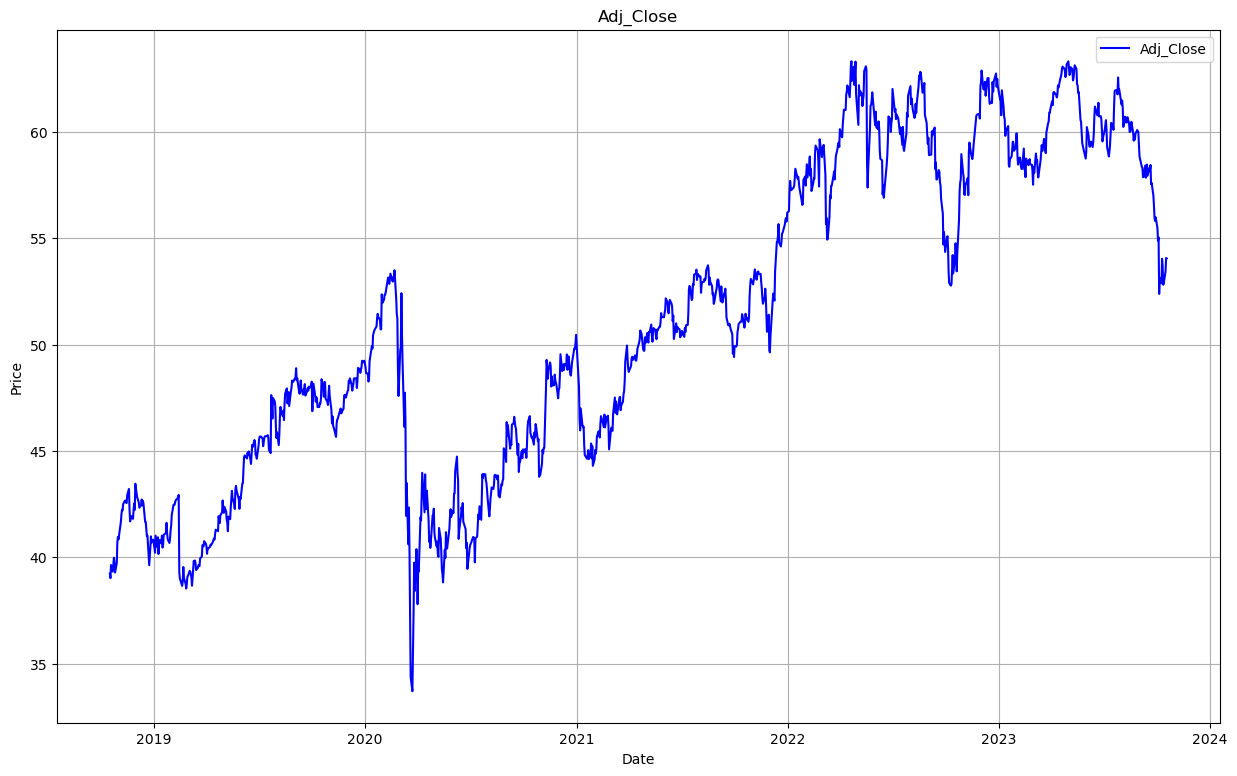

In [328]:
# Plotting
plt.figure(figsize=(15, 9))

# Plot Adj_Close
plt.plot(ko_df['Adj_Close'], label='Adj_Close', color='blue')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Adj_Close')
plt.legend()
plt.grid(True)
plt.show()

In [329]:
ko_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume', '30d_close_pct',
       '30d_future_close', '30d_close_future_pct', 'sma3', 'sma5', 'sma7',
       'sma10', 'sma12', 'sma14', 'sma20', 'sma50', 'sma100', 'sma200', 'rsi3',
       'rsi5', 'rsi7', 'rsi10', 'rsi12', 'rsi14', 'rsi20', 'rsi50', 'rsi100',
       'rsi200', 'ema3', 'ema5', 'ema7', 'ema10', 'ema12', 'ema14', 'ema20',
       'ema50', 'ema100', 'ema200'],
      dtype='object')

In [330]:
features, target = split_features_target(ko_df, f'{target_pct_change_period}d_close_future_pct', [f'{target_pct_change_period}d_future_close',f'{target_pct_change_period}d_close_pct'])

In [331]:
X = ko_df[features]
y = ko_df[target]
X.shape,y.shape
X.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume', 'sma3', 'sma5',
       'sma7', 'sma10', 'sma12', 'sma14', 'sma20', 'sma50', 'sma100', 'sma200',
       'rsi3', 'rsi5', 'rsi7', 'rsi10', 'rsi12', 'rsi14', 'rsi20', 'rsi50',
       'rsi100', 'rsi200', 'ema3', 'ema5', 'ema7', 'ema10', 'ema12', 'ema14',
       'ema20', 'ema50', 'ema100', 'ema200'],
      dtype='object')

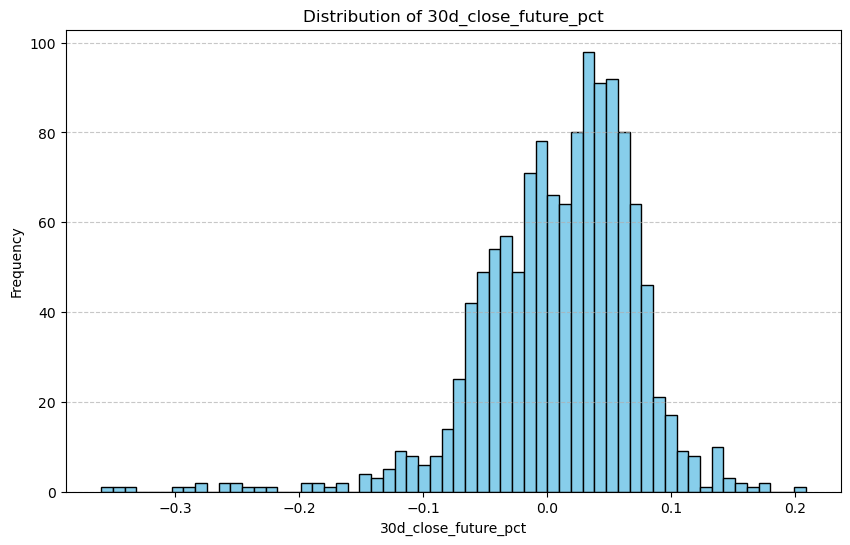

In [332]:
# Replace 'target_pct_change_periodd_close_future_pct' with your actual column name
target_column = f'{target_pct_change_period}d_close_future_pct'

# Plot the distribution using a histogram
plt.figure(figsize=(10, 6))
plt.hist(ko_df[target_column], bins=60, color='skyblue', edgecolor='black')
plt.title(f'Distribution of {target_column}')
plt.xlabel(target_column)
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [333]:
scaler = StandardScaler()
# pca = PCA(n_components=20)

X = scaler.fit_transform(X)
# X = pca.fit_transform(X)
# Convert scaled data back to a DataFrame for demonstration
X = pd.DataFrame(X, columns=features)
X = X.set_index(y.index)
X

c:\Users\user\anaconda3\envs\financial_ml_env\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\user\anaconda3\envs\financial_ml_env\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\user\anaconda3\envs\financial_ml_env\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\user\anaconda3\envs\financial_ml_env\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be

,Open,High,Low,Close,Adj_Close,Volume,sma3,sma5,sma7,sma10,...,ema3,ema5,ema7,ema10,ema12,ema14,ema20,ema50,ema100,ema200
Date,,,,,,,,,,,,,,,,,,,,,
2018-10-17,-1.631575,-1.603058,-1.560262,-1.546438,-1.612230,-0.596667,-1.663048,-1.697288,-1.665309,-1.639239,...,-1.650275,-1.659075,-1.656574,-1.648818,-1.644009,-1.640007,-1.632254,-1.633463,-1.647697,-1.669902
2018-10-18,-1.547435,-1.587590,-1.543135,-1.589231,-1.641410,-0.352293,-1.635796,-1.674624,-1.678329,-1.642044,...,-1.646236,-1.653403,-1.652896,-1.647492,-1.643584,-1.640126,-1.632936,-1.633034,-1.646340,-1.667982
2018-10-19,-1.559455,-1.517123,-1.479761,-1.465988,-1.557374,-0.165117,-1.603093,-1.636073,-1.667479,-1.636784,...,-1.602137,-1.621544,-1.629060,-1.631058,-1.630226,-1.628955,-1.625480,-1.629267,-1.643299,-1.665207
2018-10-22,-1.466731,-1.522279,-1.483186,-1.527610,-1.599391,-0.121806,-1.598811,-1.611307,-1.645279,-1.642745,...,-1.601126,-1.614343,-1.621722,-1.625287,-1.625422,-1.624910,-1.622770,-1.627325,-1.641174,-1.662896
2018-10-23,-1.595515,-1.522279,-1.544847,-1.460854,-1.553871,0.349008,-1.569611,-1.590980,-1.617238,-1.643095,...,-1.577828,-1.594333,-1.604801,-1.612251,-1.614316,-1.615298,-1.615946,-1.623643,-1.638164,-1.660135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-12,-0.197773,-0.255592,-0.349314,-0.356808,0.239876,0.620657,0.338170,0.312223,0.329304,0.414493,...,0.299607,0.328754,0.363850,0.421636,0.459825,0.496518,0.595653,0.912153,1.163892,1.403021
2023-10-13,-0.372919,-0.326059,-0.313346,-0.343115,0.250790,-0.090765,0.286293,0.305395,0.287357,0.372280,...,0.276208,0.304052,0.337005,0.392113,0.429263,0.465400,0.564568,0.888279,1.148100,1.394066
2023-10-16,-0.324840,-0.301997,-0.279089,-0.250683,0.324461,-0.337596,0.273552,0.320416,0.307843,0.344274,...,0.301397,0.312198,0.335348,0.381413,0.414798,0.448315,0.543520,0.868281,1.134120,1.385966


In [334]:
X = sm.add_constant(X)

In [335]:
X_train, y_train, X_test, y_test = train_test_split(0.85, X, y)

In [336]:
y_train

Date
2018-10-17    0.076479
2018-10-18    0.113759
2018-10-19    0.081004
2018-10-22    0.087058
2018-10-23    0.073565
                ...   
2023-01-11   -0.034994
2023-01-12   -0.022709
2023-01-13   -0.031255
2023-01-17   -0.045720
2023-01-18   -0.001505
Name: 30d_close_future_pct, Length: 1070, dtype: float64

In [337]:
model = sm.OLS(y_train, X_train)
result = model.fit()
print(result.summary())

                             OLS Regression Results                             
Dep. Variable:     30d_close_future_pct   R-squared:                       0.521
Model:                              OLS   Adj. R-squared:                  0.504
Method:                   Least Squares   F-statistic:                     31.21
Date:                  Thu, 30 Nov 2023   Prob (F-statistic):          6.45e-139
Time:                          19:11:32   Log-Likelihood:                 1805.0
No. Observations:                  1070   AIC:                            -3536.
Df Residuals:                      1033   BIC:                            -3352.
Df Model:                            36                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0172      0.002

In [338]:
# plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
# plt.xlabel('Principal Component')
# plt.ylabel('Explained Variance Ratio')
# plt.title('Explained Variance Ratio for Each Principal Component')
# plt.show()

In [339]:
dependent_variable_name = result.model.endog_names
dependent_variable_name

'30d_close_future_pct'

In [340]:
# Log the experiment with MLflow
with mlflow.start_run():

    # Log parameters
    mlflow.log_param("ticker", ticker)
    mlflow.log_param("scaling_method", "StandardScaler" if isinstance(scaler, StandardScaler) else "MinMaxScaler")
    mlflow.log_param("start_date", start_date)
    mlflow.log_param("target_variable", dependent_variable_name)
    mlflow.log_param("features", features)
    # mlflow.log_param("pca_components", pca.n_components_)

    # Log metrics
    rsquared = result.rsquared
    mlflow.log_metric("r-squared", rsquared)

     # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Model info", "Basic OLS model for stock data")

    # Infer the model signature
    signature = infer_signature(X_train, result.predict(X_train))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=result,
        artifact_path="ols_model",
        signature=signature,
        input_example=X_train,
        registered_model_name="ols_simple_model",
    )

Registered model 'ols_simple_model' already exists. Creating a new version of this model...
2023/11/30 19:11:35 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: ols_simple_model, version 2
Created version '2' of model 'ols_simple_model'.


In [341]:
# Make predictions from our model for train and test sets
pred_train = result.predict(X_train)
pred_test = result.predict(X_test)

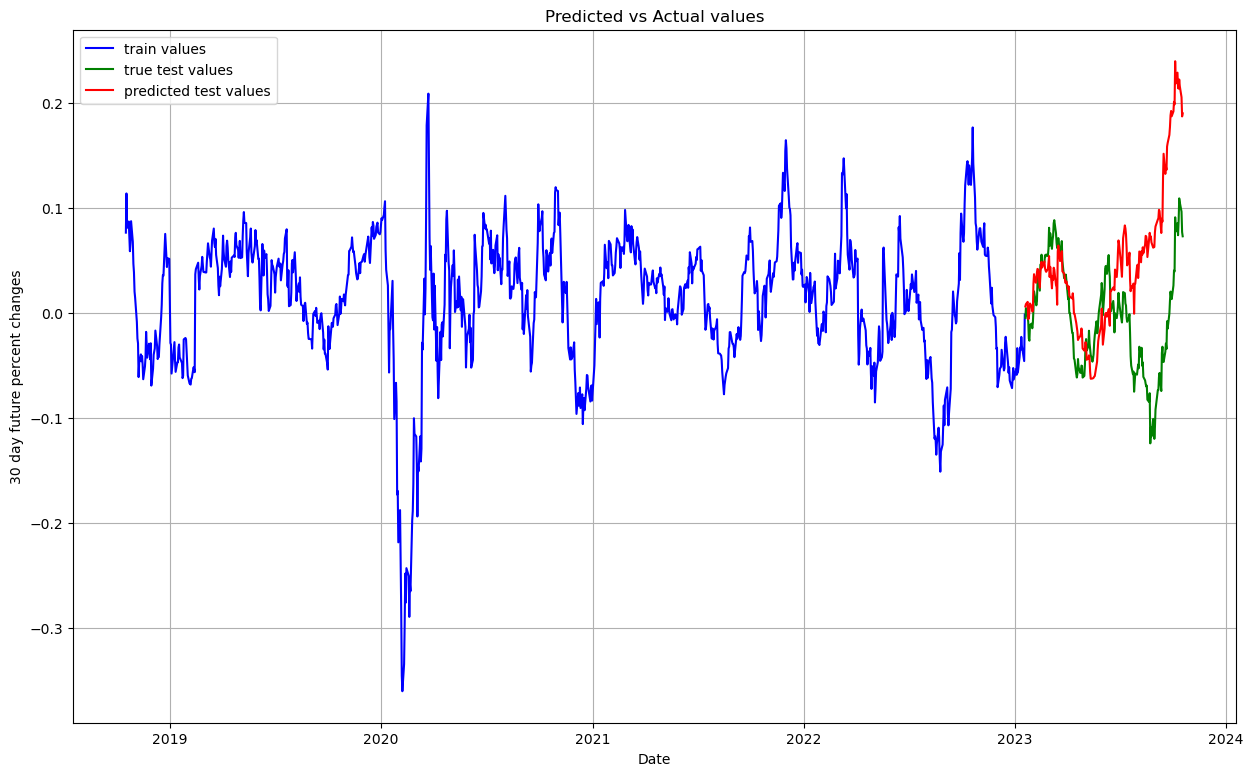

In [342]:
y_pred = pd.DataFrame(pred_test)
y_pred = y_pred.set_index(y_test.index)

# Plotting
plt.figure(figsize=(15, 9))

plt.plot(y_train, label='train values', color='blue')
plt.plot(y_test, label='true test values', color='green')
plt.plot(y_pred, label='predicted test values', color='red')

# Add labels and title
plt.xlabel('Date')
plt.ylabel(f'{target_pct_change_period} day future percent changes')
plt.title('Predicted vs Actual values')
plt.legend()
plt.grid(True)
plt.show()

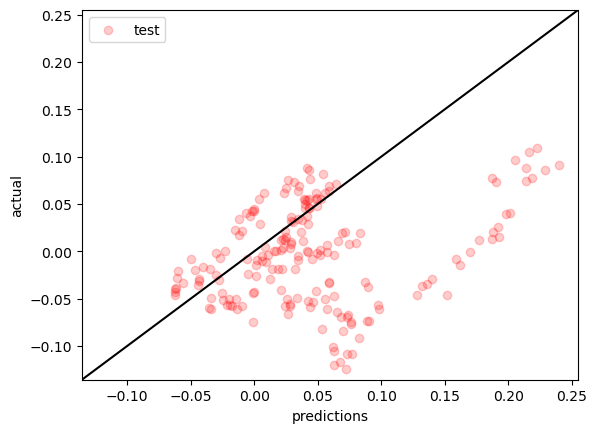

In [343]:
# Scatter the predictions vs the targets with 20% opacity
# plt.scatter(pred_train, y_train, alpha=0.2, color='b', label='train')
plt.scatter(pred_test, y_test, alpha=0.2, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
perfect_line = np.arange(min(xmin, ymin), max(xmax, ymax), 0.01)
plt.plot(perfect_line, perfect_line, c='k')

# Set the same limits on x and y axes
plt.xlim([min(xmin, ymin), max(xmax, ymax)])
plt.ylim([min(xmin, ymin), max(xmax, ymax)])

# Set the axis labels and show the plot
plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()  # show the legend
plt.show()